# Pretrained Model, classification, Elastic Net

In [1]:
import os
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/Innolab/Github') 

Mounted at /content/drive


In [6]:
from src.preprocessing.preprocessing_matlab_files import preprocess_mat_files
from src.preprocessing.data_preparation import prepare_data

In [7]:
matlab_dir = "/content/drive/MyDrive/Colab Notebooks/Innolab/Matlab Files" # Enter the directory for the matlab files
excel_path = "/content/drive/MyDrive/Colab Notebooks/Innolab/DELCODE_dataset.xlsx" # Enter the directory for the corresponding excel sheet
write_dir = "/content/drive/MyDrive/Colab Notebooks/Innolab/write" # ...
export_file = False # rename to export file
preprocessing_type = 'aggregation' 

df = preprocess_mat_files(matlab_dir = matlab_dir, excel_path = excel_path, write_dir = write_dir,
                           export_file = export_file, preprocessing_type = preprocessing_type, statistic = 'max')

loading files
Starting Preprocessing
Creating Final Dataset
Done!


In [8]:
df

,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,1_1,1_2,1_3,1_4,1_5,1_6,1_7,2_2,2_3,2_4,2_5,2_6,2_7,3_3,3_4,3_5,3_6,3_7,4_4,4_5,4_6,4_7,5_5,5_6,5_7,6_6,6_7,7_7
0,1,0a8d02f2b,11,66,17.08.2016,0,2,17,0.054016,0.0,1.0,1.442019,0.518327,0.768837,0.781428,0.798942,0.713009,0.569728,0.693034,1.493739,1.055437,1.217551,0.83579,0.699596,1.090191,0.921686,1.499958,1.446869,1.173337,0.854638,1.044583,1.215168,1.374804,0.932106,0.708553,1.14529,1.064851,1.162719,0.580244,1.430655,1.042193,1.244207,0.820703,0.885204,1.26936,1.249158,1.370669
1,2,0a71a953d,17,72,30.03.2015,0,1,20,-0.468749,1.0,2.0,1.052224,0.695097,0.608619,0.617755,0.78139,0.700752,0.661261,0.716709,1.791651,1.182725,1.42357,0.831551,0.855352,1.033703,1.231956,1.824582,1.567818,1.511543,0.75816,1.150066,0.907262,1.392219,1.032674,0.913651,1.212448,1.11951,1.315684,0.75934,0.923772,0.930864,1.534952,0.690841,0.953771,1.211397,1.204627,1.371878
2,3,0a61339db,11,72,13.05.2015,1,1,16,-0.093521,0.0,3.0,0.849411,0.564845,0.555714,0.461625,0.495856,0.788707,0.573609,0.586259,0.976541,0.613206,0.851963,0.370562,0.57159,0.787161,1.130506,1.008474,1.047959,0.770432,0.493032,0.782779,0.576682,1.325337,1.001475,0.600156,0.875494,1.110678,1.021635,0.491159,0.861457,0.908652,0.917063,0.923844,0.699996,0.932172,1.02339,1.326019
3,4,0b28aed58,17,76,18.01.2016,0,1,20,0.466027,0.0,4.0,1.108932,0.911937,0.672048,0.726071,0.781558,0.692417,0.640137,0.889349,1.832284,0.747189,1.01545,0.591824,0.752035,0.702183,1.012694,1.641574,1.338708,1.412591,0.839167,1.014339,1.173346,1.393465,1.042414,0.605472,1.01288,1.523996,1.277929,0.684653,1.290996,1.010103,1.071911,0.774992,0.901711,0.969546,1.222428,1.318915
4,5,0c1c5ae77,8,64,12.03.2015,1,1,13,1.452099,0.0,5.0,0.902319,0.762414,0.702308,0.746809,0.942794,0.745581,0.647355,0.882981,1.391585,0.816195,0.855742,0.694862,0.70731,0.793479,1.369496,1.184785,1.120838,1.121519,0.565561,0.868133,0.722518,1.071553,0.803008,0.689007,0.988444,0.808636,1.108088,0.713629,1.128626,0.83524,1.140538,0.879643,0.923432,1.153777,0.889666,1.244347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,906,f816d269a,16,84,2017-11-21,2,3,18,-2.388095,0.0,906.0,1.417167,0.612684,0.789715,0.470563,0.879898,0.911326,0.945266,0.965765,1.673786,0.815731,1.171023,0.80011,0.492837,0.885967,0.996097,1.460167,1.441553,1.374246,0.559355,0.923871,0.806196,1.305496,1.182395,0.56674,1.025421,0.828947,1.038595,0.71342,1.064049,0.880292,0.858801,0.996523,0.70373,0.887294,1.088491,1.377185
905,907,f98419539,5,71,2014-09-11,2,3,13,-1.860675,1.0,907.0,1.107081,0.489421,0.620626,0.396967,1.084753,0.643209,0.861978,1.207757,1.509016,0.881523,0.977685,0.640263,0.565235,0.739145,1.026662,1.510382,1.111873,1.226397,0.74193,0.906277,1.366042,1.258578,0.829937,0.639695,1.048475,0.877682,1.387487,0.621841,1.000504,1.59777,1.281182,0.760985,0.987812,1.168594,0.962629,1.500568
906,908,fade343c8,8,78,2015-11-23,2,3,8,-1.868184,1.0,908.0,0.769773,0.426069,0.621418,0.445918,0.537328,0.650858,0.611799,0.927391,0.908209,0.627183,0.848678,0.461005,0.47463,0.637235,0.649359,0.84264,0.94299,0.799259,0.518328,0.541375,0.779953,0.904409,0.608589,0.659208,0.865961,0.8663,0.836314,0.502671,0.726753,0.808973,0.914337,0.60809,0.578736,0.769957,1.071035,1.132849
907,909,fbc8a48a0,14,61,2017-03-20,2,3,9,-2.432351,0.0,909.0,0.778697,0.526224,0.526895,0.466178,0.669391,0.619619,0.61346,0.634253,1.335476,0.497276,0.845021,0.599592,0.627642,0.881996,1.127493,1.301591,1.258621,0.890437,0.537687,0.614483,0.689756,0.954526,0.812523,0.400247,1.182646,0.834384,1.158202,0.579332,0.986103,1.063459,0.906869,0.812011,0.861273,1.008168,1.016017,1.177611


In [9]:
classification = True
columns_drop = ["ConnID", "Repseudonym", "siteid", "visdat", "MEM_score", "Apoe", "IDs"]
target = "prmdiag"
y_0 = [0]
y_1 = [2, 3]
train_size = 0.8
seed = 1855
split = True

In [10]:
# preparation of data
ytrain, Xtrain, ytest, Xtest = prepare_data(data = df, classification = classification,
                         columns_drop = columns_drop, target = target, y_0 = y_0, y_1 = y_1,
                         train_size = train_size, seed = seed, split = split)


pd.concat([ytrain, Xtrain], axis = 1) # test data

,y,age,sex,edyears,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,1_1,1_2,1_3,1_4,1_5,1_6,1_7,2_2,2_3,2_4,2_5,2_6,2_7,3_3,3_4,3_5,3_6,3_7,4_4,4_5,4_6,4_7,5_5,5_6,5_7,6_6,6_7,7_7
855,1.0,-0.295663,0.497994,-0.380863,0.846074,1.303253,-0.619003,-0.190408,-0.704940,-0.189270,-0.339278,-0.738822,0.744005,0.502608,0.004459,0.410074,-0.088472,-0.150667,0.013208,0.140143,-1.020640,0.214844,-1.125117,0.250421,-0.943166,0.378039,-0.867038,0.344453,0.680365,-0.847215,-1.555283,-0.954199,0.167159,-0.250272,-0.689509,-1.403658,1.232474,-1.641769,-0.331958,0.338581
387,1.0,-0.784678,0.497994,-1.030316,-1.344234,-0.258228,-0.906389,-0.827302,-0.912395,-0.298913,-1.241221,-0.876571,-0.347143,-0.193534,0.328059,-0.406164,-0.979948,0.521619,0.662430,-0.358383,-0.633392,-0.674078,-1.073027,-0.953584,-1.298072,-1.629989,-0.709770,-0.764808,-0.091595,-0.565669,-1.035300,-0.907887,-1.331845,1.652079,-0.435119,0.696369,-0.702924,0.290929,0.476052,-0.412558
857,1.0,0.519362,0.497994,-0.705589,0.054971,-1.192157,0.155920,-0.311111,-0.348956,-0.738048,-1.263058,-1.763253,-0.184989,1.177708,-0.045932,1.690740,-0.198614,0.589527,-0.914967,0.612265,0.383703,-0.283625,-0.163599,-0.760982,0.671291,-1.138592,0.117333,0.329126,-0.140269,2.046859,-1.930014,-0.694846,-0.678797,-1.084894,-1.681931,-0.589317,-0.446018,-0.221252,0.299685,-0.319656
755,1.0,-0.784678,-1.130230,-0.380863,0.674751,1.818089,0.537100,2.025831,-0.196468,1.183524,0.613413,0.630646,0.108275,3.517292,0.606927,3.073861,2.869119,0.724238,1.304109,0.912426,0.998294,1.023875,2.256371,2.695840,2.976608,-0.529917,0.630613,1.814090,0.984070,0.632679,0.255364,2.027044,0.586827,1.745970,1.481910,1.330515,1.174155,0.588658,0.179356,-0.065573
580,1.0,0.519362,0.497994,-0.380863,-0.511754,-0.301572,0.425735,-0.517009,-0.777692,-0.329136,-0.488420,1.500363,-1.233337,0.010272,-1.486970,-0.735321,-0.695990,-0.138663,0.789465,-0.698995,0.169306,-1.329345,0.068175,-0.285111,-0.561278,-1.400767,-0.641456,-1.804528,-1.480629,-0.782912,-0.538270,-1.164474,-0.376958,-0.462221,-0.585971,-0.371076,0.997172,1.363984,-0.790418,0.508848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,-1.599703,0.497994,-0.380863,-1.689246,1.179885,-0.797561,-0.754826,-1.453164,-1.332221,-0.683161,-1.335650,-0.502261,-0.638960,-0.153224,-1.380289,1.280131,2.029587,0.517059,0.650053,0.830023,-0.164782,-1.264365,0.624218,0.552812,2.167035,-0.634755,-0.528899,0.449581,0.447050,-0.386485,-1.714879,-0.809143,-1.922007,-0.616427,-0.334214,2.640613,-0.491179,0.235406,0.429079
339,0.0,0.030347,0.497994,-0.705589,-0.682231,-0.825922,-0.180468,0.005495,-0.940860,-0.958715,-0.428101,-1.546926,0.030598,-0.027002,-0.048203,-0.012105,0.436150,-0.238231,-1.210093,0.145800,0.663984,-0.435637,-0.159554,1.834983,0.212662,-0.110732,0.969260,0.899377,0.239739,-0.316627,-0.510633,0.830200,-0.215140,-0.378183,0.782456,0.566929,0.682664,-0.483771,0.353503,-0.418474
200,0.0,-0.947683,0.497994,0.593317,-0.465723,-0.104341,-0.123064,0.982588,1.159343,-0.556013,-0.603695,-0.577150,-0.943063,0.185393,-0.906700,0.679199,0.030945,-0.932923,-0.940337,-0.984548,-0.003209,-1.082808,-0.651568,-0.535537,-0.839067,-0.147265,0.530284,-0.837864,0.096320,-1.411319,0.349829,-0.878093,-0.083131,-1.434077,-1.322602,-0.858870,-0.507888,-1.062304,-0.098586,-0.953907
148,1.0,0.193352,-1.130230,1.567496,0.002380,0.191819,0.244706,-0.906317,-0.450546,0.005057,-0.212069,0.053493,-0.763285,-0.244141,-0.650411,0.646583,-0.156130,0.734486,1.508167,-0.336513,1.237339,-0.248642,-0.881790,2.740023,1.158002,0.527002,0.497147,1.425965,0.998836,0.095819,0.105285,0.385750,0.909304,0.298517,0.196151,1.106713,0.143113,0.076911,1.386852,0.676630


# Train Model
Evaluate AUC and accuracy on test data

In [ ]:
from src.models.pipeline_elastic_net import model_elastic_net
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
model = model_elastic_net(X_train = Xtrain, y_train = ytrain, 
                          classification = True, 
                          n_alphas_logreg = 10, 
                          l1_ratios_logreg= np.linspace(0,  1, 11).tolist(), 
                          cv_logreg = 5,
                          max_iter = 500) 

In [ ]:
predictions = model.predict(Xtest)
accuracy_score(ytest, predictions)

0.7127659574468085

In [ ]:
pred_prob = model.predict_proba(Xtest)
auc = roc_auc_score(ytest, pred_prob[:, 1])
auc

0.7585081585081584

In [ ]:
model.l1_ratio_

array([0.6])

In [ ]:
model.C_

array([0.04641589])

# Save Model

In [2]:
import pickle

In [ ]:
filename ='pretrained_elnet_class_agg_max.sav'
pickle.dump(model, open(filename, 'wb'))

# Evaluation

In [3]:
# load model
model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Innolab/pretrained_elnet_class_agg_max.sav", 'rb'))

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
predictions = model.predict(Xtest)

In [ ]:
 precision_score(ytest, predictions)

0.8043478260869565

In [ ]:
recall_score(ytest, predictions)

0.6727272727272727

In [ ]:
f1_score(ytest, predictions)

0.7326732673267325

# Visualisation coefficients

In [4]:
from src.visualization.viz_utils import plot_coef_elastic_net

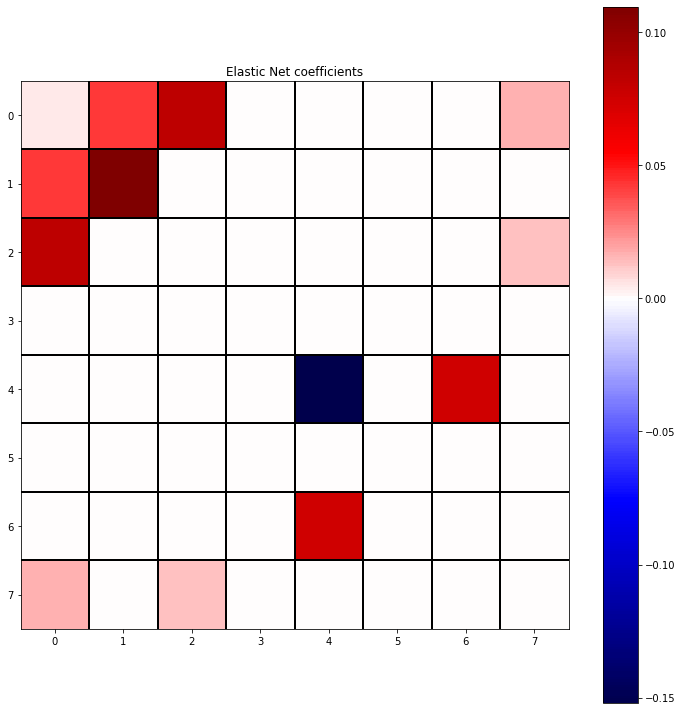

In [5]:
plot_coef_elastic_net(model)

# Feature Importance

In [31]:
from src.visualization.viz_utils import plot_grouped_FI
from src.visualization.group_imp import grouped_permutation_FI, group_only_permutation_FI

In [52]:
  ind_conn_cols = []
  for x in range(len(model.feature_names_in_)):
    if len(model.feature_names_in_[x].split("_"))>1 and model.feature_names_in_[x].split("_")[0].isdigit() and model.feature_names_in_[x].split("_")[1].isdigit():
      ind_conn_cols.append(x)

In [53]:
groups_df = pd.DataFrame({'conn_name': model.feature_names_in_[ind_conn_cols], 'region': model.feature_names_in_[ind_conn_cols]})

In [54]:
df_importance = grouped_permutation_FI(model, Xtest, ytest, groups_df, m = 10)

In [55]:
df_importance.head()

,region,mean decrease accuracy
0,0_0,4.255319e-03
1,0_1,-1.063830e-02
2,0_2,1.702128e-02
3,0_3,1.110223e-16
4,0_4,1.110223e-16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


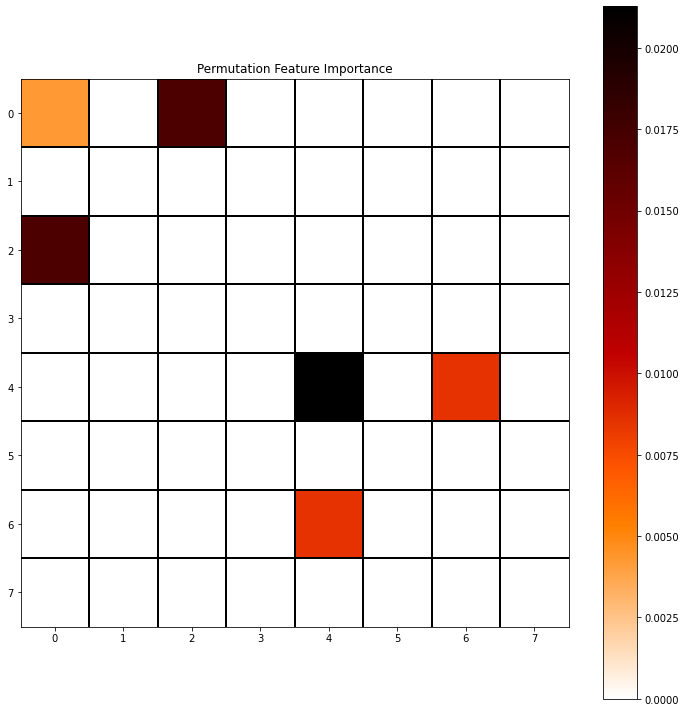

In [65]:
plot_grouped_FI(df_importance, title = "Permutation Feature Importance")

In [69]:
df_importance_only = group_only_permutation_FI(model, Xtest, ytest, groups_df, m = 10)

In [70]:
df_importance_only.head()

,region,mean decrease accuracy
0,0_0,0.004255
1,0_1,0.005319
2,0_2,0.009574
3,0_3,0.000000
4,0_4,0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


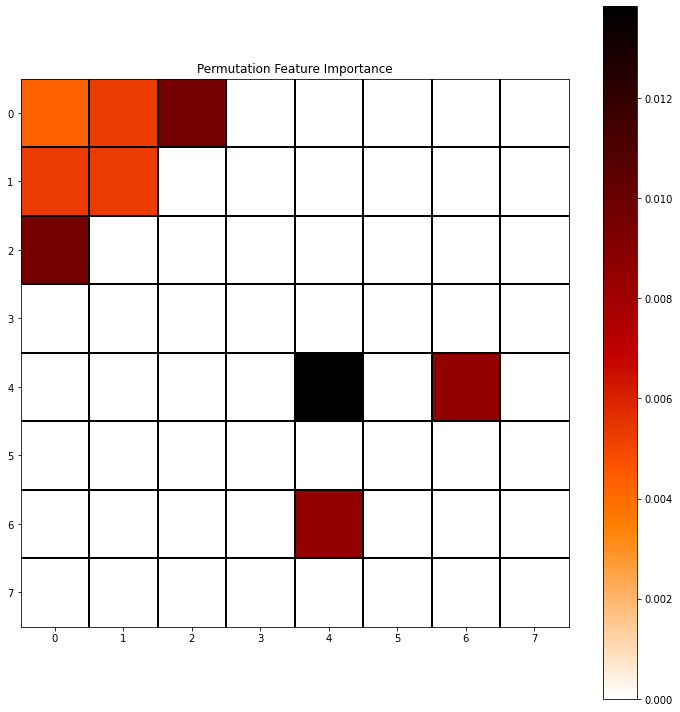

In [71]:
plot_grouped_FI(df_importance_only, title = "Permutation Feature Importance")